In [10]:
import pandas as pd # package required to read a datafile 
import numpy as np # package 'Numerical Python' which is a core library for scientific computing

dataset=pd.read_csv("Mock_data.csv",sep=",",header=None)
dataset.head()
X=dataset.values[:,0:2]
y=dataset.values[:,2]

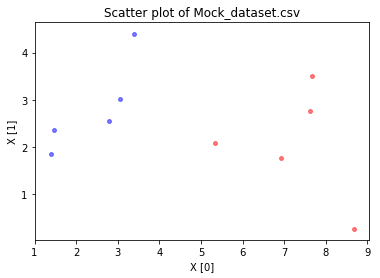

In [11]:
import matplotlib.pyplot as plt

I=y>0.5
J=y<0.5
plt.scatter(X[I,0], X[I,1], c='red', s=15, alpha=0.5)
plt.scatter(X[J,0], X[J,1], c='blue', s=15, alpha=0.5)
plt.title("Scatter plot of Mock_dataset.csv")
plt.xlabel("X [0]")
plt.ylabel("X [1]")
plt.show()

In [3]:
# Estimate weights and bias parameters using Perceptron algorithm and make final prediction
def train_weights(X,y, l_rate, n_epoch):
    weights=np.zeros(3) # a three dimensional array of zeroes
    for epoch in range(n_epoch):
        sum_error = 0.0
        for i in range(len(X[:,0])):
            if np.dot(X[i,:],weights[1:3])+weights[0]>=0: # checking the activation function
                prediction=1.0
            else:
                prediction=0.0
            error = y[i]- prediction
            sum_error += error**2 # sum of squared errors to check 'goodness' of the algorithm
            weights[0] = weights[0] + l_rate * error # updating the bias parameter
            for j in range(len(X[0,:])):
                weights[j+1] = weights[j+1] + l_rate * error * X[i,j] # updating the weights parameter
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights


In [4]:
# Running the Perceptron code on mock dataset

l_rate = 0.1 # learning rate
n_epoch = 10 #  number of iterations
weights = train_weights(X,y, l_rate, n_epoch)
print(weights) # will give respectively b,w_1,w_2,...

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
[-0.1         0.2065364  -0.23418118]


In [5]:
def plot_data(X,y,weights):
    # fig config
    plt.figure(figsize=(10,6))
    plt.grid(True)

    #plot input samples(2D data points) and i have two classes. 
    #one is +1 and second one is -1, so it red color for +1 and blue color for -1
    for input,target in zip(X,y):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Here i am calculating slope and intercept with given three weights
    for i in np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
        plt.plot(i, y,'ko')

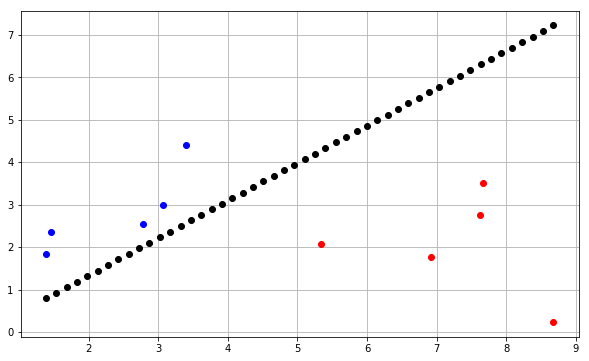

In [6]:
plot_data(X,y,weights)

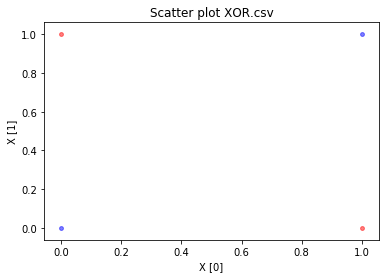

>epoch=0, lrate=0.100, error=4.000
>epoch=1, lrate=0.100, error=4.000
>epoch=2, lrate=0.100, error=4.000
>epoch=3, lrate=0.100, error=4.000
>epoch=4, lrate=0.100, error=4.000
>epoch=5, lrate=0.100, error=4.000
>epoch=6, lrate=0.100, error=4.000
>epoch=7, lrate=0.100, error=4.000
>epoch=8, lrate=0.100, error=4.000
>epoch=9, lrate=0.100, error=4.000
[0. 0. 0.]


In [22]:
dataset=pd.read_csv("XOR.csv",sep=",",header=None)
dataset.head()
X=dataset.values[:,0:2]
y=dataset.values[:,2]

import matplotlib.pyplot as plt

I=y>0.5
J=y<0.5
plt.scatter(X[I,0], X[I,1], c='red', s=15, alpha=0.5)
plt.scatter(X[J,0], X[J,1], c='blue', s=15, alpha=0.5)
plt.title("Scatter plot XOR.csv")
plt.xlabel("X [0]")
plt.ylabel("X [1]")
plt.show()

l_rate = 0.1
n_epoch = 10
weights = train_weights(X,y, l_rate, n_epoch)
print(weights)

In [13]:
# Extra cell to check internal computation
weights[1:3]

array([-0.23418118, -0.1       ])

In [20]:
np.linspace(np.amin(X[:,:]),np.amax(X[:,:]))

array([0.24206865, 0.41417784, 0.58628702, 0.75839621, 0.93050539,
       1.10261457, 1.27472376, 1.44683294, 1.61894212, 1.79105131,
       1.96316049, 2.13526967, 2.30737886, 2.47948804, 2.65159723,
       2.82370641, 2.99581559, 3.16792478, 3.34003396, 3.51214314,
       3.68425233, 3.85636151, 4.02847069, 4.20057988, 4.37268906,
       4.54479824, 4.71690743, 4.88901661, 5.0611258 , 5.23323498,
       5.40534416, 5.57745335, 5.74956253, 5.92167171, 6.0937809 ,
       6.26589008, 6.43799926, 6.61010845, 6.78221763, 6.95432682,
       7.126436  , 7.29854518, 7.47065437, 7.64276355, 7.81487273,
       7.98698192, 8.1590911 , 8.33120028, 8.50330947, 8.67541865])

In [21]:
y>0.5

array([False, False, False, False, False,  True,  True,  True,  True,
        True])